In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter

In [3]:
import pandas as pd

csv_file_path = '/Users/zhaosmac/Desktop/ECON 695/week 11 class 1 hw/week 11 class 1 hw draft/pre/911_Calls_for_Service_2021_.csv'
df = pd.read_csv(csv_file_path)

print(df)

         OBJECTID           callKey            callDateTime       priority  \
0               1  6301020A5FEEAC59  2021/01/01 05:00:00+00           High   
1               2  29CC9DA95FEEAC72  2021/01/01 05:00:00+00  Non-Emergency   
2               3  5601020A5FEEAC7C  2021/01/01 05:00:00+00            Low   
3               4  9C01020A5FEEAC67  2021/01/01 05:00:00+00           High   
4               5  5901020A5FEEAC81  2021/01/01 05:00:00+00            Low   
...           ...               ...                     ...            ...   
1690939   1690940   FCC9DA961C9B3D9  2021/12/27 07:38:00+00            Low   
1690940   1690941   FCC9DA961CB345F  2021/12/28 10:59:00+00            Low   
1690941   1690942   FCC9DA961CC587E  2021/12/29 07:44:59+00  Non-Emergency   
1690942   1690943   FCC9DA961CF4310  2021/12/31 12:51:00+00         Medium   
1690943   1690944   FCC9DA961CF5D64  2021/12/31 14:42:59+00            Low   

        district       description  callNumber               in

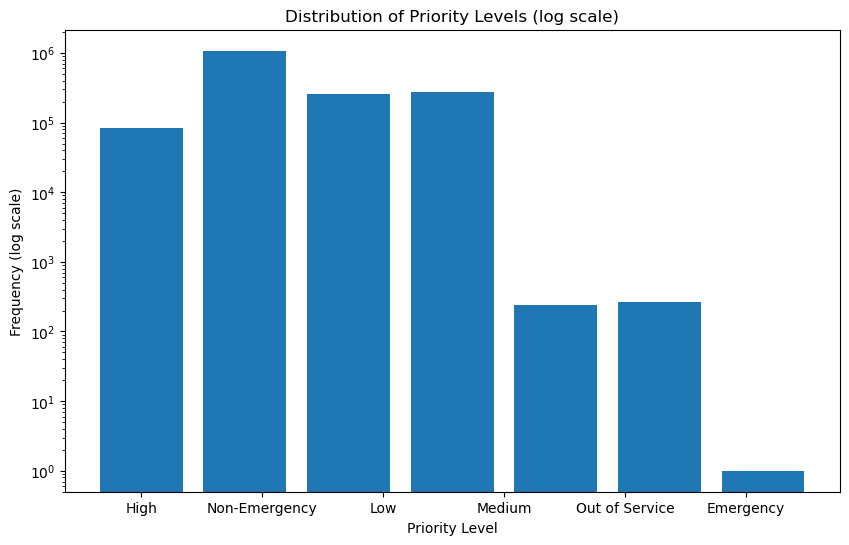

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the 911 calls data
csv_file_path = '/Users/zhaosmac/Desktop/ECON 695/week 11 class 1 hw/week 11 class 1 hw draft/pre/911_Calls_for_Service_2021_.csv'
df = pd.read_csv(csv_file_path)

# Convert 'priority' column to strings
df['priority'] = df['priority'].astype(str)

# Plot a histogram of priority levels with a log scale on the y-axis
plt.figure(figsize=(10, 6))
plt.hist(df['priority'], bins=df['priority'].nunique(), align='left', rwidth=0.8, log=True)
plt.xlabel('Priority Level')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Priority Levels (log scale)')

# Remove background grid lines
plt.grid(False)

plt.show()

In [3]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


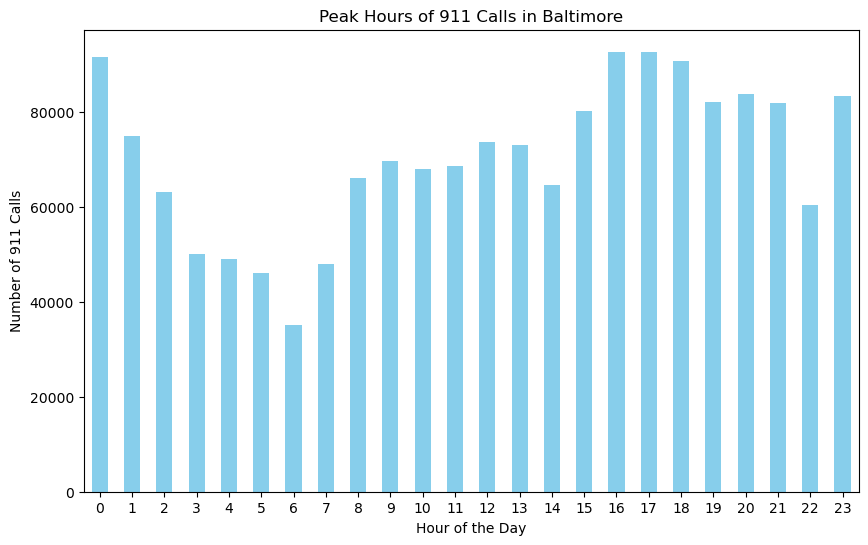

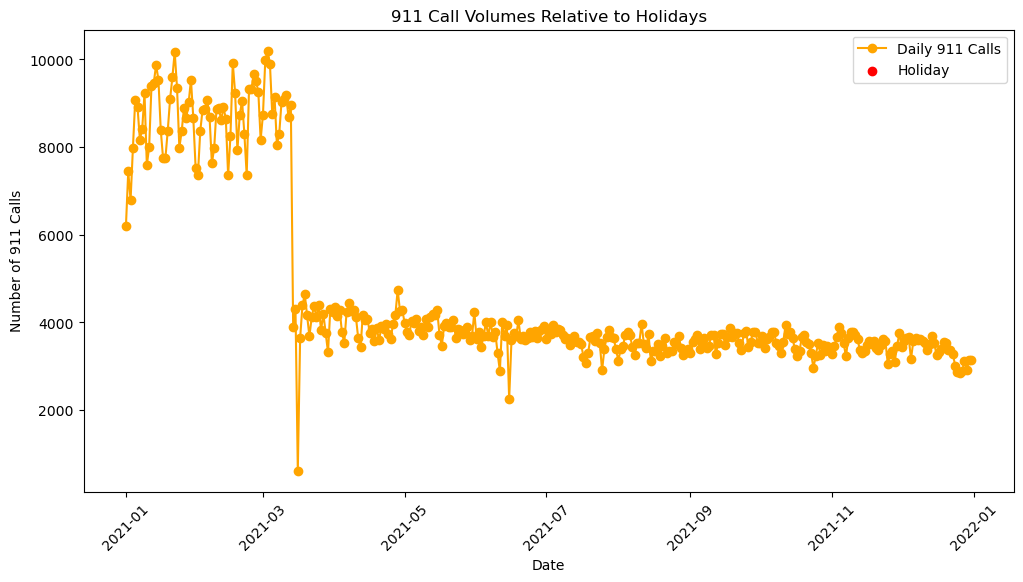

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the 911 calls data
csv_file_path = '/Users/zhaosmac/Desktop/911_Calls_for_Service_2021_.csv'
df = pd.read_csv(csv_file_path, parse_dates=['callDateTime'])

# Extract the hour from the 'callDateTime' column
df['hour'] = df['callDateTime'].dt.hour

# Extract the date from the 'callDateTime' column
df['date'] = df['callDateTime'].dt.date

# Group by hour to find peak hours
hourly_counts = df.groupby('hour').size()

# Plot peak hours
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Peak Hours of 911 Calls in Baltimore')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of 911 Calls')
plt.xticks(rotation=0)
plt.show()

# Identify patterns relative to specific holidays
# You can add a column for holidays and analyze call volumes on those days

# Example: If you have a list of holidays
holidays = ['2021-01-01', '2021-07-04', '2021-12-25']
df['is_holiday'] = df['date'].isin(holidays)

# Group by date and check call volumes on holidays
daily_counts = df.groupby('date').size()

# Plot call volumes on holidays
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', marker='o', color='orange', label='Daily 911 Calls')
plt.scatter(df[df['is_holiday']]['date'], df[df['is_holiday']].groupby('date').size(), color='red', label='Holiday')
plt.title('911 Call Volumes Relative to Holidays')
plt.xlabel('Date')
plt.ylabel('Number of 911 Calls')
plt.legend()
plt.xticks(rotation=45)
plt.show()


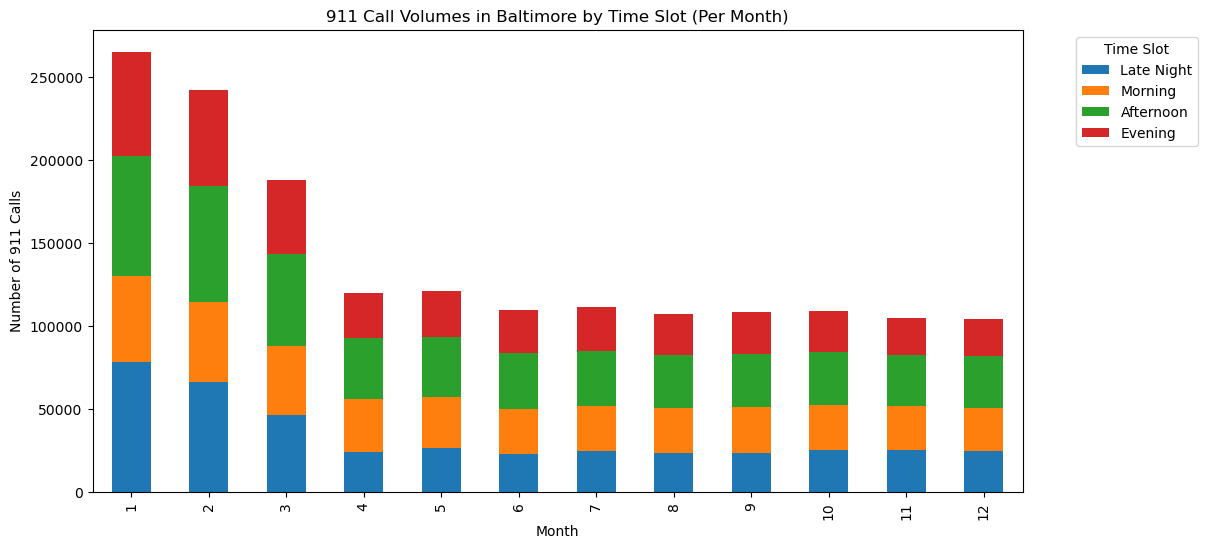

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
csv_file_path = '/Users/zhaosmac/Desktop/911_Calls_for_Service_2021_.csv'
df = pd.read_csv(csv_file_path, parse_dates=['callDateTime'])

# Extract month and hour from 'callDateTime'
df['month'] = df['callDateTime'].dt.month
df['hour'] = df['callDateTime'].dt.hour

# Define time slots
bins = [0, 6, 12, 18, 24]
labels = ['Late Night', 'Morning', 'Afternoon', 'Evening']
df['time_slot'] = pd.cut(df['hour'], bins=bins, labels=labels, include_lowest=True)

# Group by month and time slot to find call volumes
monthly_time_slot_counts = df.groupby(['month', 'time_slot']).size().reset_index(name='call_count')

# Pivot the table to have time slots as columns
pivot_table = monthly_time_slot_counts.pivot(index='month', columns='time_slot', values='call_count').fillna(0)

# Create a bar graph
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('911 Call Volumes in Baltimore by Time Slot (Per Month)')
plt.xlabel('Month')
plt.ylabel('Number of 911 Calls')
plt.legend(title='Time Slot', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
